# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [6]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [7]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,187-1-201-MI1-rep1,103.196858,0.030603,1285.808995,0.027229,90.655557,1285.808995,172.736868,0.606514,3.744921,...,1.135081,0.046274,0.013381,1.067114,1.091133,0.070014,0.007558,PseudoVoigtModel,PseudoVoigtModel,No
1,187-1-201-MI1-rep2,103.285530,0.029319,1285.743404,0.025968,85.597057,1285.743404,152.840377,0.636577,3.107338,...,1.094412,0.178984,0.014874,1.033003,1.042857,0.034786,0.007273,PseudoVoigtModel,PseudoVoigtModel,No
2,187-1-201-MI1-rep3,103.281816,0.029920,1285.727729,0.027009,88.756401,1285.727729,167.193620,0.599612,2.746320,...,1.061265,0.242743,0.013511,1.068627,1.100000,0.073534,0.007214,PseudoVoigtModel,PseudoVoigtModel,No
3,187-1-204-MI1-rep1,103.304334,0.042793,1285.640599,0.038959,37.957023,1285.640599,57.082816,0.522543,1.409523,...,1.086449,0.109083,0.027533,1.177049,1.150943,0.191221,0.016412,PseudoVoigtModel,PseudoVoigtModel,No
4,187-1-204-MI1-rep2-20mw,103.280261,0.022508,1285.729513,0.019323,68.318919,1285.729513,110.522982,0.641221,1.431895,...,1.057654,0.019934,0.018771,1.071186,1.099515,0.073797,0.008639,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [8]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant'],
 sort=True)
diad_meta[0]

'10 FG19-101-A-50X-rep1.txt'

## Now get all the important information out of the metadata files

In [9]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 22/22 [00:00<00:00, 55.18it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG19-101-A-50X-rep1.txt,"April 25, 2024\n",April,25.0,6.020,45.0,5.0,50.0,"['0h', '3m', '46s']",12:40:55 PM\n,45655.0,1324.964
1,FG19-101-A-50X-rep2.txt,"April 25, 2024\n",April,25.0,6.037,45.0,5.0,50.0,"['0h', '3m', '46s']",12:45:08 PM\n,45908.0,1324.964
2,FG19-101-A-50X-rep3.txt,"April 25, 2024\n",April,25.0,6.064,45.0,5.0,50.0,"['0h', '3m', '46s']",12:56:48 PM\n,46608.0,1324.964
3,FG19-101-A-50X-12mw.txt,"April 25, 2024\n",April,25.0,12.005,45.0,5.0,50.0,"['0h', '3m', '46s']",1:00:49 PM\n,46849.0,1324.964
4,187-1-201-MI1-rep1.txt,"April 25, 2024\n",April,25.0,11.953,60.0,4.0,50.0,"['0h', '4m', '2s']",1:33:14 PM\n,48794.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [10]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG19-101-A-50X-rep1'

In [11]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG19-101-A-50X-rep1', 'FG19-101-A-50X-rep2',
       'FG19-101-A-50X-rep3', 'FG19-101-A-50X-12mw', '187-1-201-MI1-rep1',
       '187-1-201-MI1-rep2', '187-1-201-MI1-rep3', '187-1-201-FI2',
       '187-1-201-FI3', '187-1-201-FI4', '187-1-201-FI5',
       '187-1-203-xtal4-FI1', '187-1-203-xtal4-FI2', '187-1-204-MI1-rep1',
       '187-1-204-MI1-rep2-20mw', '187-1-204-FI1', '187-1-204-FI2',
       '187-1-205-MI1', '187-1-206-MI1', 'FG19-101-A-50X-rep4',
       'FG19-101-A-50X-rep5', 'FG19-101-A-50X-rep6'], dtype=object)

## Now get filename from spectra into same form as metadata

In [12]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-1-201-MI1-rep1


In [13]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-1-201-MI1-rep1', '187-1-201-MI1-rep2', '187-1-201-MI1-rep3',
       '187-1-204-MI1-rep1', '187-1-204-MI1-rep2-20mw', '187-1-205-MI1',
       '187-1-206-MI1', '187-1-201-FI2', '187-1-201-FI3', '187-1-201-FI4',
       '187-1-201-FI5', '187-1-203-xtal4-FI1', '187-1-203-xtal4-FI2',
       '187-1-204-FI1', '187-1-204-FI2', 'FG19-101-A-50X-rep1',
       'FG19-101-A-50X-rep2', 'FG19-101-A-50X-rep3',
       'FG19-101-A-50X-12mw', 'FG19-101-A-50X-rep4',
       'FG19-101-A-50X-rep5', 'FG19-101-A-50X-rep6'], dtype='<U23')

In [14]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-201-MI1-rep1,103.196858,0.030603,1285.808995,0.027229,90.655557,1285.808995,172.736868,0.606514,3.744921,...,April,25.0,11.953,60.0,4.0,50.0,"['0h', '4m', '2s']",1:33:14 PM\n,48794.0,1324.964
1,187-1-201-MI1-rep2,103.285530,0.029319,1285.743404,0.025968,85.597057,1285.743404,152.840377,0.636577,3.107338,...,April,25.0,11.940,60.0,4.0,50.0,"['0h', '4m', '1s']",1:38:37 PM\n,49117.0,1324.964
2,187-1-201-MI1-rep3,103.281816,0.029920,1285.727729,0.027009,88.756401,1285.727729,167.193620,0.599612,2.746320,...,April,25.0,11.934,60.0,4.0,50.0,"['0h', '4m', '1s']",1:43:53 PM\n,49433.0,1324.964
3,187-1-204-MI1-rep1,103.304334,0.042793,1285.640599,0.038959,37.957023,1285.640599,57.082816,0.522543,1.409523,...,April,25.0,11.984,60.0,4.0,50.0,"['0h', '4m', '1s']",4:52:26 PM\n,60746.0,1324.964
4,187-1-204-MI1-rep2-20mw,103.280261,0.022508,1285.729513,0.019323,68.318919,1285.729513,110.522982,0.641221,1.431895,...,April,25.0,20.020,60.0,5.0,50.0,"['0h', '5m', '1s']",4:57:10 PM\n,61030.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [15]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [16]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [17]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

8.065794211496094e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-201-MI1-rep1,0.093134,0.012689,0.012106,0.003802,102.985300,0.030551,0.000821,0.030603,11.953,...,48794.0,1095.363607,357.859870,29.636757,Spline,1.023970,48794.0,0.997950,0.997942,0.997958
1,187-1-201-MI1-rep2,0.128181,0.012218,0.011598,0.003843,103.073749,0.029271,0.000821,0.029319,11.940,...,49117.0,1095.413038,548.162034,44.981907,Spline,1.580164,49117.0,0.997950,0.997942,0.997958
2,187-1-201-MI1-rep3,0.126696,0.012443,0.011836,0.003840,103.070002,0.029870,0.000819,0.029920,11.934,...,49433.0,NaN,NaN,NaN,NaN,NaN,49433.0,0.997949,0.997941,0.997957
3,187-1-204-MI1-rep1,0.135029,0.017359,0.016924,0.003858,103.091032,0.042713,0.000824,0.042793,11.984,...,60746.0,NaN,NaN,NaN,NaN,NaN,60746.0,0.997935,0.997927,0.997943
4,187-1-204-MI1-rep2-20mw,0.125496,0.009698,0.008906,0.003838,103.066972,0.022477,0.000825,0.022508,20.020,...,61030.0,NaN,NaN,NaN,NaN,NaN,61030.0,0.997935,0.997927,0.997943


In [18]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

8.065794211496094e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-201-MI1-rep1,0.093134,0.012689,0.012106,0.003802,102.985300,0.030551,0.000821,0.030603,11.953,...,48794.0,1095.363607,357.859870,29.636757,Spline,1.023970,48794.0,0.997950,0.997942,0.997958
1,187-1-201-MI1-rep2,0.128181,0.012218,0.011598,0.003843,103.073749,0.029271,0.000821,0.029319,11.940,...,49117.0,1095.413038,548.162034,44.981907,Spline,1.580164,49117.0,0.997950,0.997942,0.997958
2,187-1-201-MI1-rep3,0.126696,0.012443,0.011836,0.003840,103.070002,0.029870,0.000819,0.029920,11.934,...,49433.0,NaN,NaN,NaN,NaN,NaN,49433.0,0.997949,0.997941,0.997957
3,187-1-204-MI1-rep1,0.135029,0.017359,0.016924,0.003858,103.091032,0.042713,0.000824,0.042793,11.984,...,60746.0,NaN,NaN,NaN,NaN,NaN,60746.0,0.997935,0.997927,0.997943
4,187-1-204-MI1-rep2-20mw,0.125496,0.009698,0.008906,0.003838,103.066972,0.022477,0.000825,0.022508,20.020,...,61030.0,NaN,NaN,NaN,NaN,NaN,61030.0,0.997935,0.997927,0.997943


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [19]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_April 25, 2024_fitted_2024-08-22.xlsx


## This helps visualize the errors on each spectra 

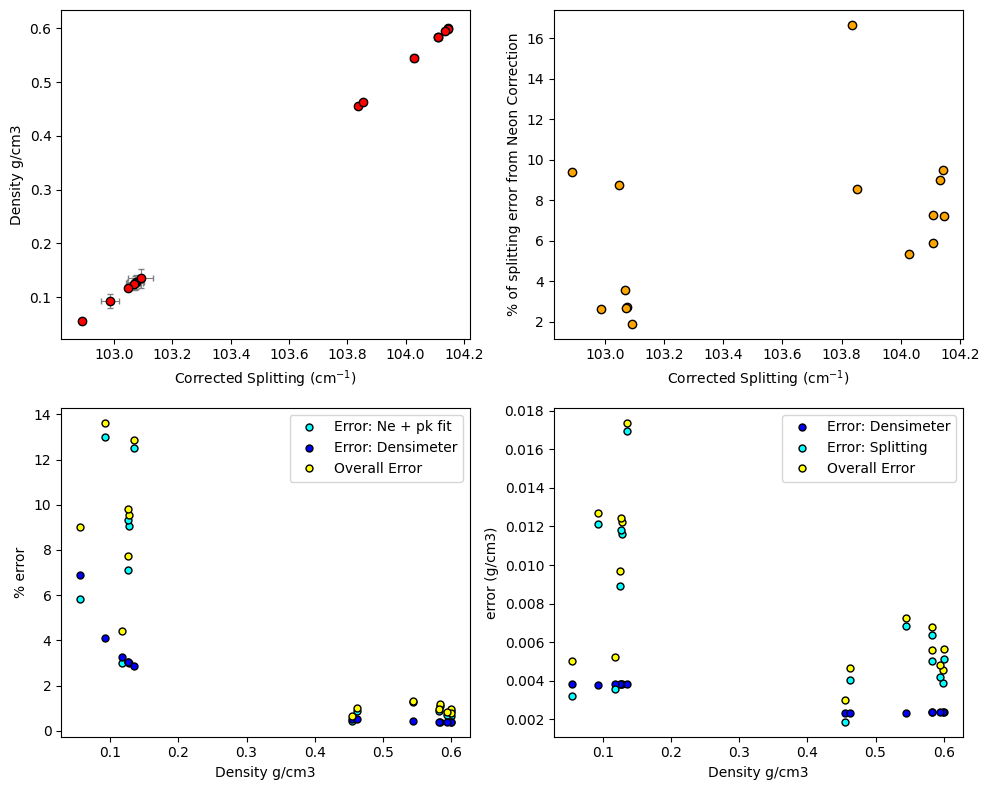

In [20]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

In [21]:
df[df['filename'].str.contains("MI")]

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-201-MI1-rep1,0.093134,0.012689,0.012106,0.003802,102.985300,0.030551,0.000821,0.030603,11.953,...,48794.0,1095.363607,357.859870,29.636757,Spline,1.023970,48794.0,0.997950,0.997942,0.997958
1,187-1-201-MI1-rep2,0.128181,0.012218,0.011598,0.003843,103.073749,0.029271,0.000821,0.029319,11.940,...,49117.0,1095.413038,548.162034,44.981907,Spline,1.580164,49117.0,0.997950,0.997942,0.997958
2,187-1-201-MI1-rep3,0.126696,0.012443,0.011836,0.003840,103.070002,0.029870,0.000819,0.029920,11.934,...,49433.0,NaN,NaN,NaN,NaN,NaN,49433.0,0.997949,0.997941,0.997957
3,187-1-204-MI1-rep1,0.135029,0.017359,0.016924,0.003858,103.091032,0.042713,0.000824,0.042793,11.984,...,60746.0,NaN,NaN,NaN,NaN,NaN,60746.0,0.997935,0.997927,0.997943
4,187-1-204-MI1-rep2-20mw,0.125496,0.009698,0.008906,0.003838,103.066972,0.022477,0.000825,0.022508,20.020,...,61030.0,NaN,NaN,NaN,NaN,NaN,61030.0,0.997935,0.997927,0.997943
5,187-1-205-MI1,0.055579,0.005008,0.003230,0.003827,102.890522,0.008153,0.000843,0.008126,12.010,...,63911.0,1093.485234,1148.329694,74.444943,Spline,1.524734,63911.0,0.997931,0.997923,0.997939
6,187-1-206-MI1,0.117992,0.005221,0.003555,0.003825,103.048035,0.008971,0.000859,0.008948,11.994,...,65609.0,NaN,NaN,NaN,NaN,NaN,65609.0,0.997929,0.997921,0.997938


## lets look at standards


Text(0, 0.5, 'Density g/cm3')

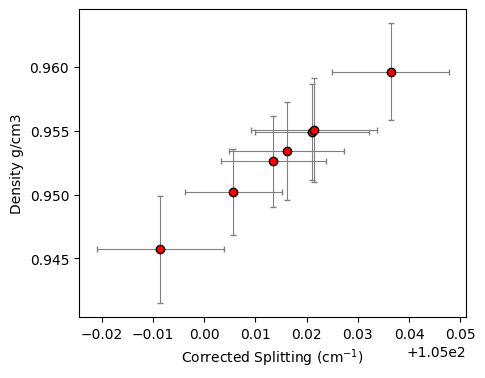

In [22]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [23]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

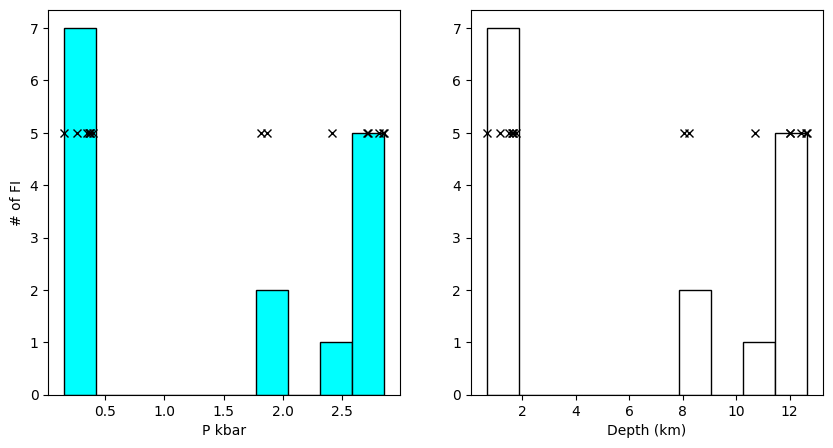

In [24]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')